## Praca domowa 4

#### Autor: Jan Skwarek

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [9]:
df[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.EU_Sales > df.NA_Sales)][["Name"]]

,Name
4199,Mario & Sonic at the Rio 2016 Olympic Games
6477,Mario & Sonic at the Rio 2016 Olympic Games
14703,Teddy Together


Odp: Te gry to Mario & Sonic at the Rio 2016 Olympic Games (gra wystąpiła w naszym data framie aż dwa razy) oraz Teddy Together.

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [17]:
df_2010 = df[df.Year == 2010][["Genre", "Global_Sales"]]
df_2010.head()
df_2010.groupby(df.Genre).agg(func="sum").sort_values(["Global_Sales"]).tail(1)

,Global_Sales
Genre,
Action,117.64


Odp: Najwięce w 2010 roku zarobiły gry Akcji.

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [31]:
temp1 = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean")
## temp1.head(20)
temp2 = temp1[temp1.JP_Sales > temp1.EU_Sales].sort_values(["JP_Sales"], ascending=False).reset_index()
## temp2.head()
temp3 = temp2.rename(columns = {"Genre"    : "Typ Gry",
                              "JP_Sales" : "Średnia sprzedaż w Japonii"})
result = temp3[["Typ Gry", "Średnia sprzedaż w Japonii"]]
result

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


Odp: Patrz tabelka `result` powyżej.

### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

1) oryginalny wykres wraz ze źródłem:

Źródło: https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparcie-wzroslo-wszystkim-tylko-nie-konfederacji-i-psl

Oryginalny wykres:

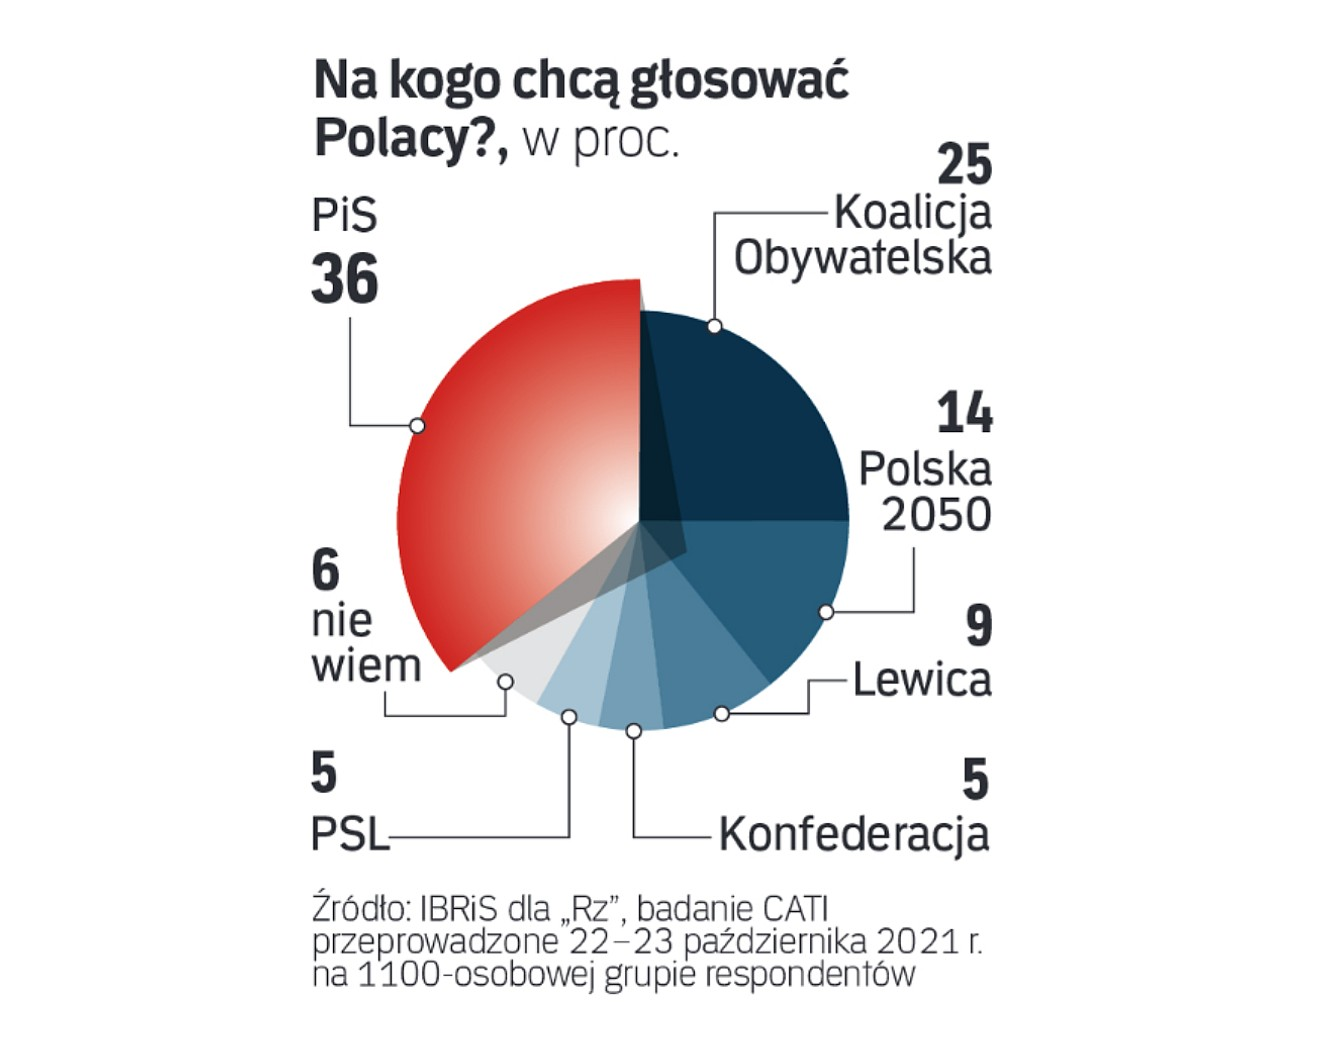

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny):

Link do pracy domowej (była to moja praca domowa): https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/SkwarekJan

Wykres w ggplot2:

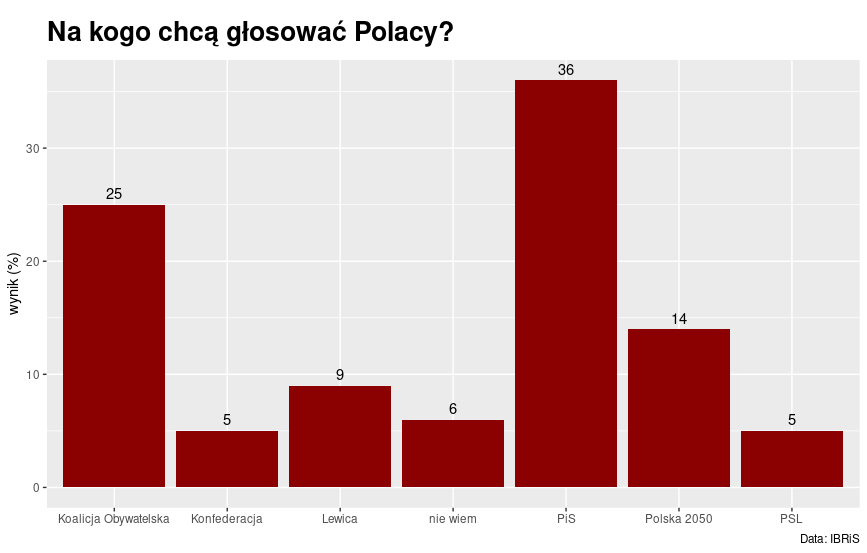

3) poprawiony wykres z punktu 2) w Pythonie:

[Text(0, 0, '36'),
 Text(0, 0, '25'),
 Text(0, 0, '14'),
 Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '5')]

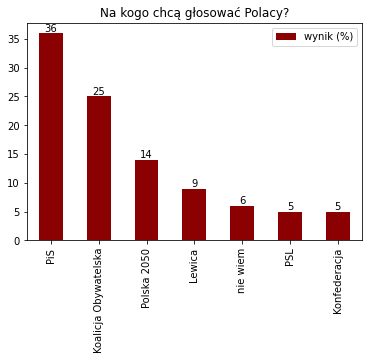

In [44]:
import pandas as pd

data = {'partia': ['PiS', 'Koalicja Obywatelska', 'Polska 2050', 'Lewica', 'nie wiem', 'PSL', 'Konfederacja'],
        'wynik (%)': [36, 25, 14, 9, 6, 5, 5]}
df = pd.DataFrame(data)
## df.head(10)
fig = df.plot(x ='partia',
        y='wynik (%)',
        kind = 'bar',
        color = 'darkred',
        title = 'Na kogo chcą głosować Polacy?',
        xlabel = '')
fig.bar_label(fig.containers[0])

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Wykres ten jest lepszy od wykresu kołowego z tego samego powodu, z którego był od niego lepszy wykres z drugiej pracy domowej. Wykresy kołowe są na ogół złe, ponieważ ludzie z natury mają problemy z odróżnianiem kątów. Na dodatek dochodził nam w tym wykresie niepotrzebny efekt 3D oraz dziwny cień, który padał na wykres. Dlaczego ten wykres jest lepszy od wykresu z drugiej pracy domowej? Ma na to wpływ przede wszystkim posortowanie słupków. Ułożone od najwyższego do najmniejszego pozwalają nam łatwiej orientować się w strukturze wykresu. Teraz znalezienie partii z najwyższym i najniższym wynikiem zajmuje nam dosłownie sekundę. Kolejnym plusem jest wyśrodkowanie tytułu. Teraz wykres wygląda, można by rzec, nieco "symetryczniej". Ostatnim z mocniejszych stron jest położenie i wygląd legendy. Wygląda ona po prostu staranniej i estetyczniej niż zwykły napis z lewej strony osi (na dodatek pionowy).